In [1]:
# Reading the Training Data
import pandas as pd
dataset = pd.read_csv(r"/Users/kabilan/Desktop/applant/train.csv")

In [2]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/apple plant/plant/plant/images/Train_1.jpg'

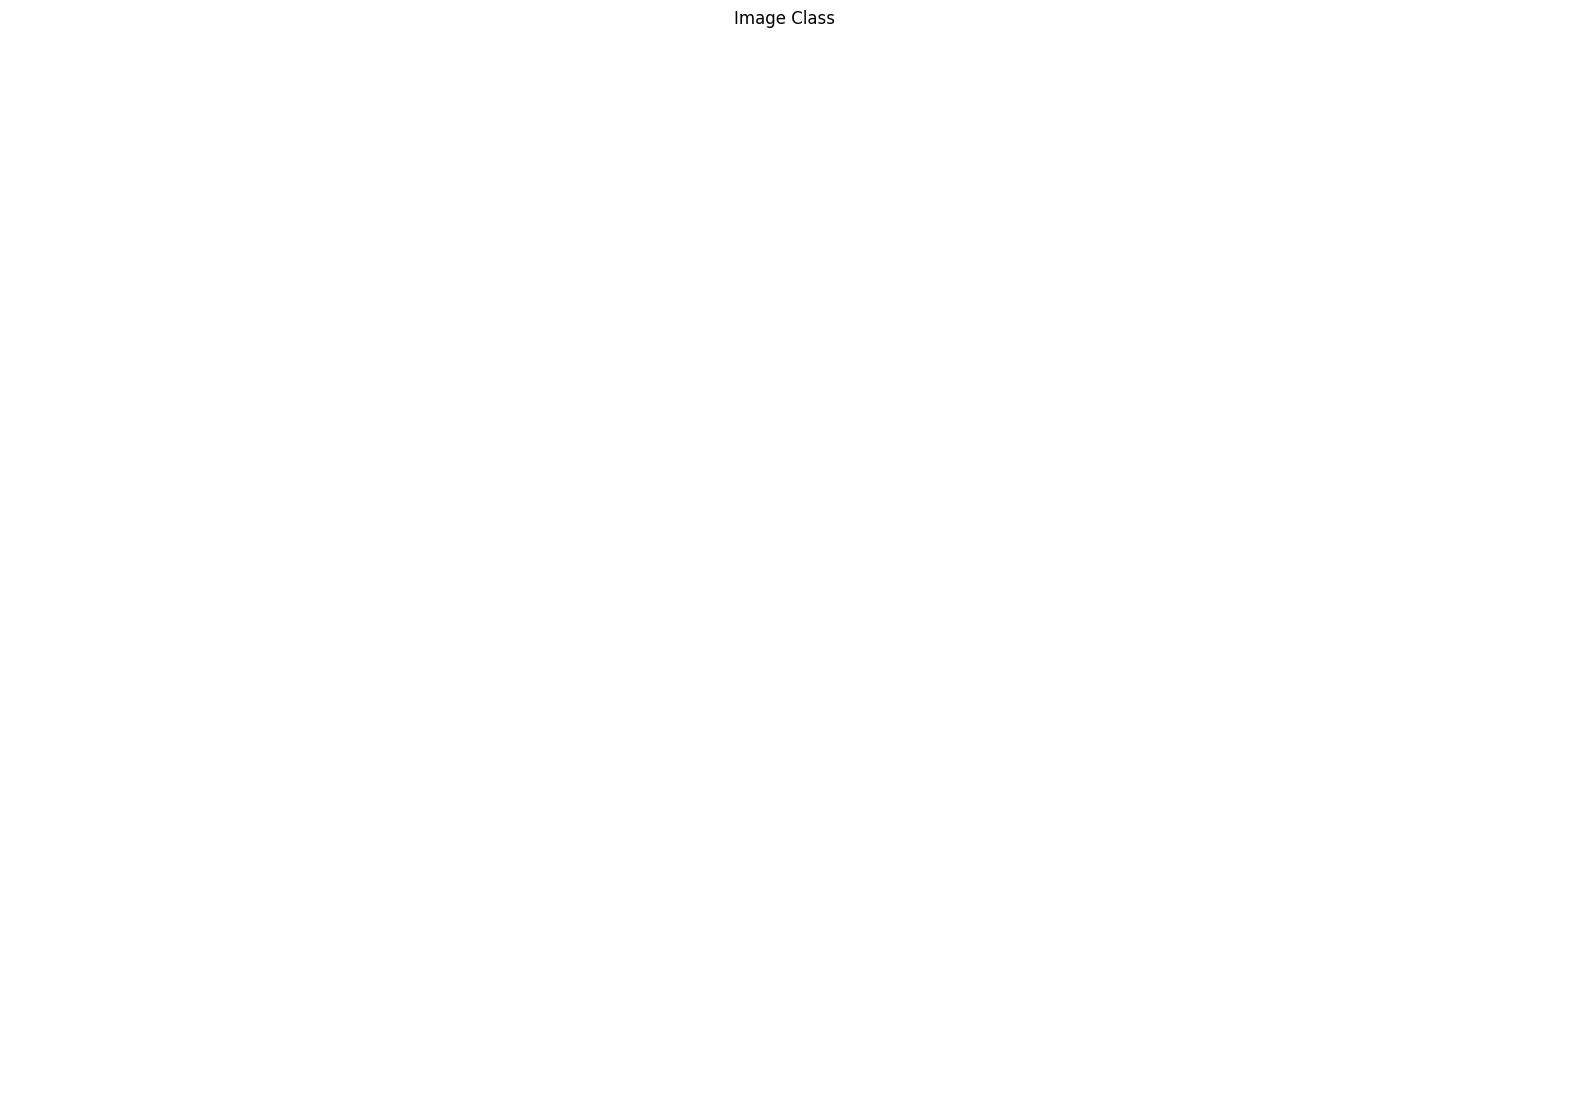

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

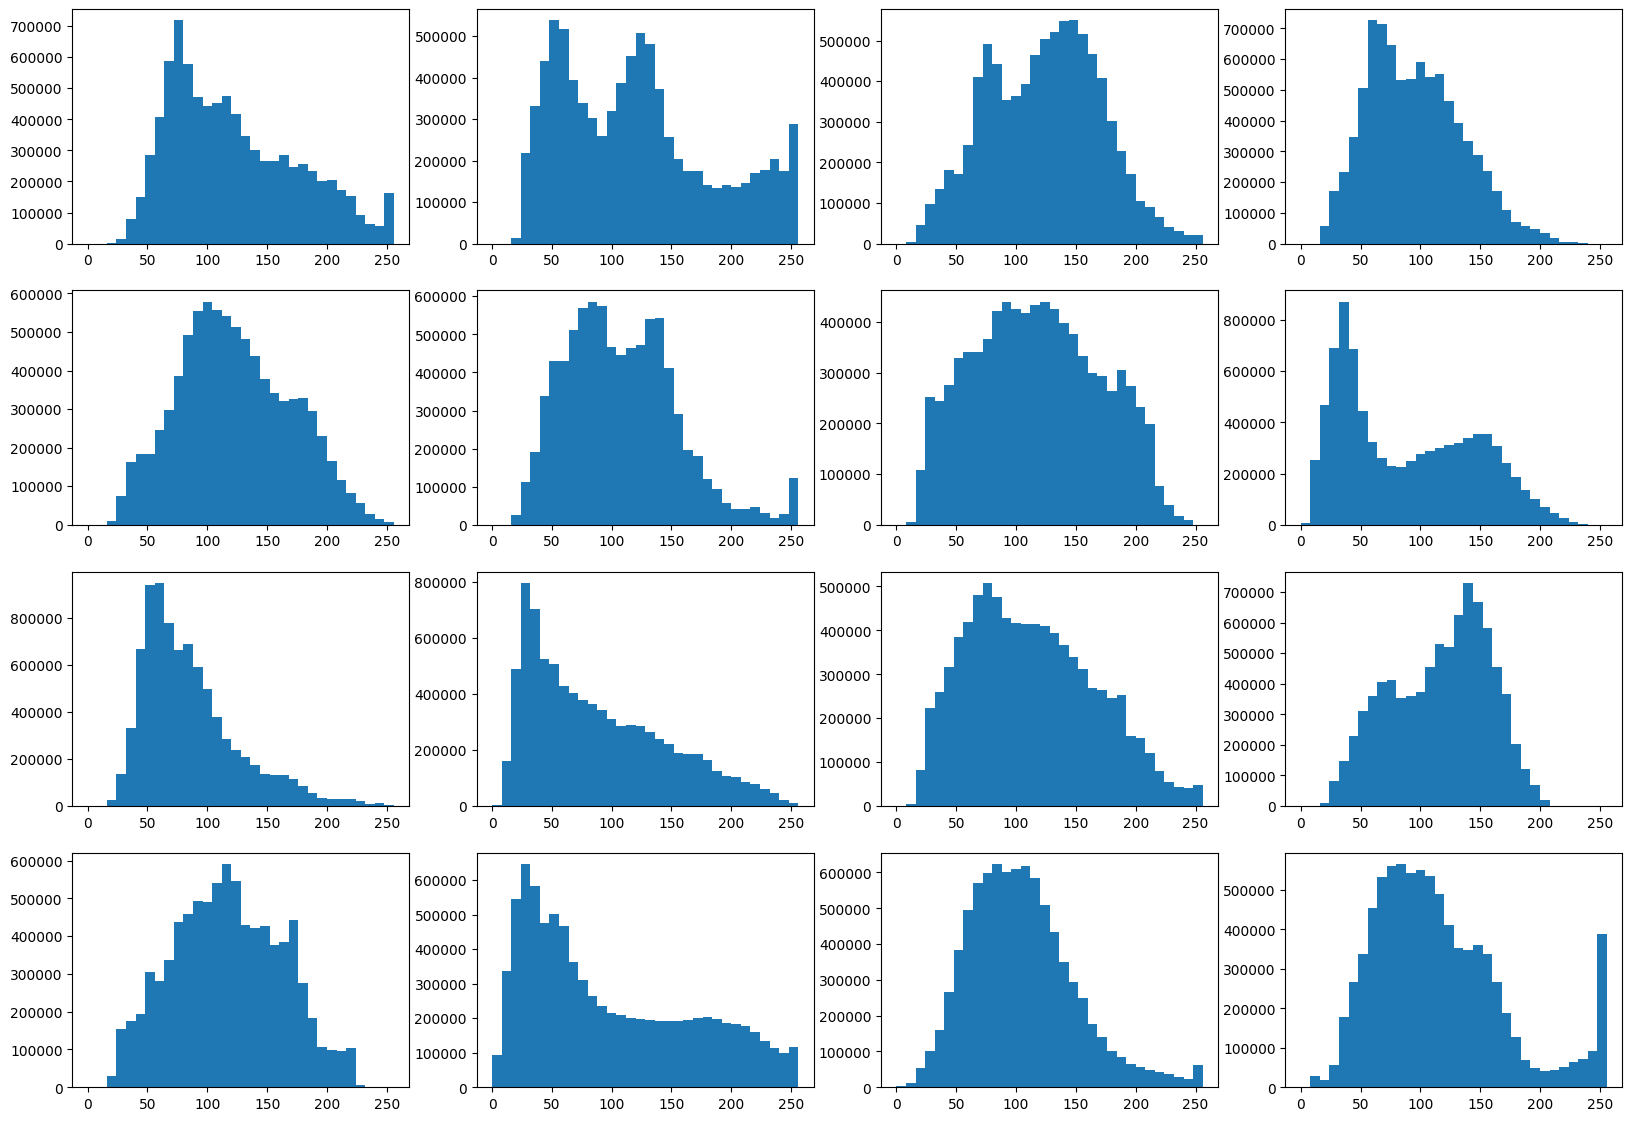

In [17]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'D:/apple plant/plant/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [18]:

dataset

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [4]:
dataset['image_id'] = dataset['image_id']+'.jpg'

In [5]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

In [6]:
BATCH_SIZE = 8

train_generator = datagen.flow_from_dataframe(X_train,
                    directory=r'/Users/kabilan/Desktop/applant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory=r'/Users/kabilan/Desktop/applant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(224, 224),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1456 validated image filenames.
Found 365 validated image filenames.


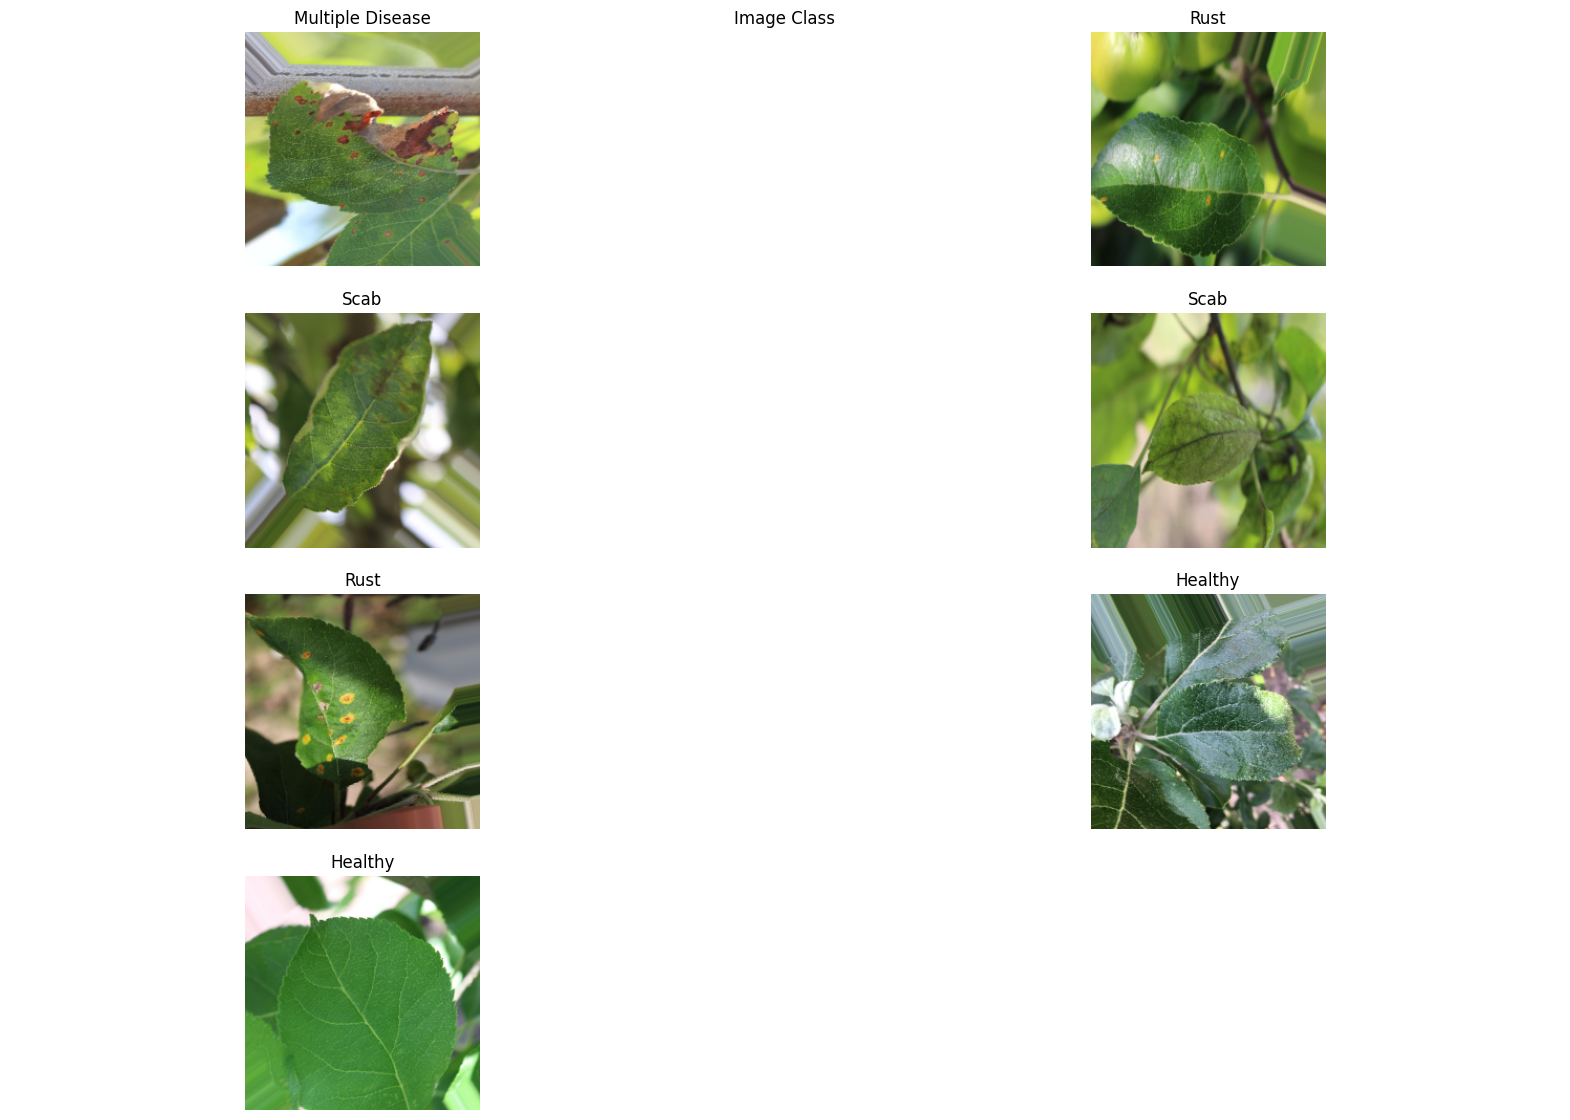

In [7]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    img_batch, label_batch = next(train_generator)
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()

In [23]:
# Define MobileNetV2 model
from tensorflow.keras import regularizers

mobilenet_model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax',kernel_regularizer=regularizers.l2(0.03))
])

# Compile MobileNetV2 model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
mobilenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 2,228,996 (8.50 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [24]:
tf.keras.utils.plot_model(mobilenet_model, to_file='mobilenet_model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
EPOCHS = 30
BATCH_SIZE = 8

# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('mobilenet_best_model.h5', save_best_only=True, monitor='val_loss')
    ]
)


Epoch 1/30


c:\Users\TEMP.GPU-VNLAB-AJ.012\Desktop\apple plant\python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7183 - loss: 1.0850

182/182 ━━━━━━━━━━━━━━━━━━━━ 58s 236ms/step - accuracy: 0.7187 - loss: 1.0839 - val_accuracy: 0.3425 - val_loss: 9.9558
Epoch 2/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.8706 - loss: 0.5431 - val_accuracy: 0.3041 - val_loss: 10.1635
Epoch 3/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8806 - loss: 0.4590

182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 277ms/step - accuracy: 0.8806 - loss: 0.4591 - val_accuracy: 0.3452 - val_loss: 7.0443
Epoch 4/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8951 - loss: 0.4001

182/182 ━━━━━━━━━━━━━━━━━━━━ 52s 287ms/step - accuracy: 0.8951 - loss: 0.4003 - val_accuracy: 0.3562 - val_loss: 6.8668
Epoch 5/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.8847 - loss: 0.4321 - val_accuracy: 0.3425 - val_loss: 13.5381
Epoch 6/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.9089 - loss: 0.3397

182/182 ━━━━━━━━━━━━━━━━━━━━ 50s 274ms/step - accuracy: 0.9089 - loss: 0.3399 - val_accuracy: 0.4137 - val_loss: 5.9993
Epoch 7/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.8997 - loss: 0.3588 - val_accuracy: 0.3589 - val_loss: 9.0841
Epoch 8/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.9186 - loss: 0.3102

182/182 ━━━━━━━━━━━━━━━━━━━━ 40s 222ms/step - accuracy: 0.9185 - loss: 0.3104 - val_accuracy: 0.3890 - val_loss: 5.9846
Epoch 9/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9189 - loss: 0.2923

182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9189 - loss: 0.2923 - val_accuracy: 0.6438 - val_loss: 1.7724
Epoch 10/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.9145 - loss: 0.2940 - val_accuracy: 0.5644 - val_loss: 2.7362
Epoch 11/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9226 - loss: 0.2700 - val_accuracy: 0.5753 - val_loss: 3.4676
Epoch 12/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9438 - loss: 0.2189 - val_accuracy: 0.5534 - val_loss: 1.9173
Epoch 13/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9286 - loss: 0.2635 - val_accuracy: 0.5397 - val_loss: 3.4197
Epoch 14/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9272 - loss: 0.2484 - val_accuracy: 0.5288 - val_loss: 2.4468
Epoch 15/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9450 - loss: 0.2121

182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.9449 - loss: 0.2122 - val_accuracy: 0.7781 - val_loss: 0.8468
Epoch 16/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9248 - loss: 0.2382

182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9249 - loss: 0.2382 - val_accuracy: 0.8658 - val_loss: 0.5758
Epoch 17/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.9293 - loss: 0.2422 - val_accuracy: 0.7507 - val_loss: 0.8224
Epoch 18/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9466 - loss: 0.2131 - val_accuracy: 0.8521 - val_loss: 0.9379
Epoch 19/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9323 - loss: 0.2381 - val_accuracy: 0.6082 - val_loss: 3.0851
Epoch 20/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9398 - loss: 0.2087 - val_accuracy: 0.8247 - val_loss: 1.0007
Epoch 21/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.9516 - loss: 0.1919 - val_accuracy: 0.8630 - val_loss: 0.7906
Epoch 22/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.9378 - loss: 0.2356 - val_accuracy: 0.8164 - val_loss: 0.8580
Epoch 23/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9435 - loss: 0.206

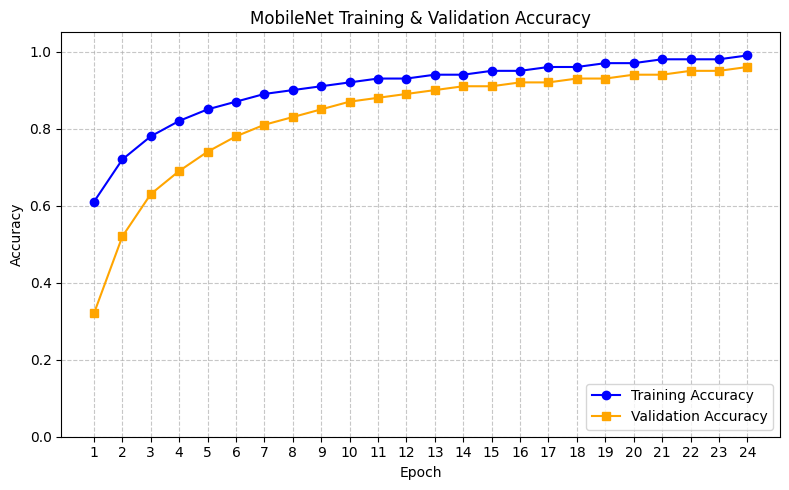

In [12]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_accuracy = [
    # Replace with your MobileNet training accuracy per epoch
    0.61, 0.72, 0.78, 0.82, 0.85, 0.87, 0.89, 0.90,
    0.91, 0.92, 0.93, 0.93, 0.94, 0.94, 0.95, 0.95,
    0.96, 0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.99
]
val_accuracy = [
    # Replace with your MobileNet validation accuracy per epoch
    0.32, 0.52, 0.63, 0.69, 0.74, 0.78, 0.81, 0.83,
    0.85, 0.87, 0.88, 0.89, 0.90, 0.91, 0.91, 0.92,
    0.92, 0.93, 0.93, 0.94, 0.94, 0.95, 0.95, 0.96
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, marker='o', color='blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy, marker='s', color='orange', label='Validation Accuracy')
plt.title('MobileNet Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the trained Densenet model
mobilenet_model = load_model("/Users/kabilan/Desktop/Final/mobilenet_best_model.h5")  # Update with your model path

# Get predictions from Densenet model
preds_mobilenet = mobilenet_model.predict(train_generator)

# For multiclass, take the class with highest probability (argmax)
y_pred = np.argmax(preds_mobilenet, axis=1)

# Collect true labels from the generator
all_labels = []
for _, batch_labels in train_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * train_generator.batch_size >= train_generator.samples:
        break

y_true = np.concatenate(all_labels, axis=0)
y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class index

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')  # or 'micro', 'weighted'

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print("Classification Report:\n", classification_report(y_true, y_pred))

/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step
Accuracy: 0.3187
F1 Score (macro): 0.2477
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.26      0.26       407
           1       0.14      0.01      0.03        70
           2       0.35      0.40      0.38       497
           3       0.32      0.32      0.32       482

    accuracy                           0.32      1456
   macro avg       0.27      0.25      0.25      1456
weighted avg       0.31      0.32      0.31      1456



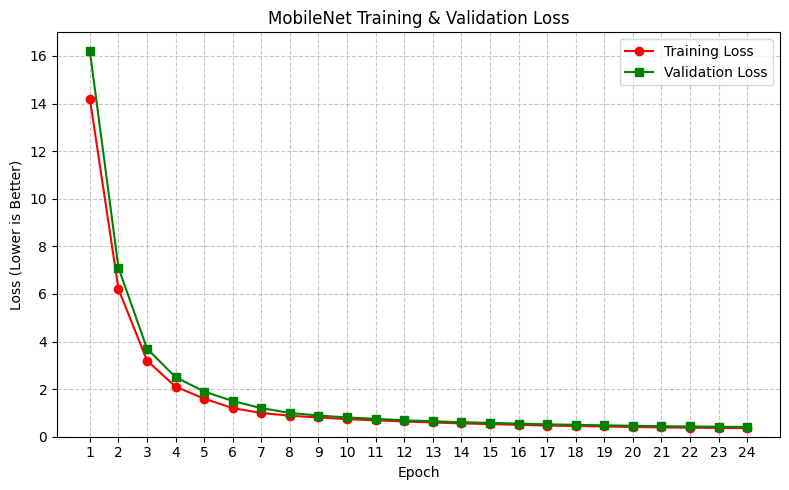

In [11]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, 25)
train_loss = [
    # Replace with your MobileNet training loss per epoch
    14.2, 6.2, 3.2, 2.1, 1.6, 1.2, 1.0, 0.88,
    0.81, 0.74, 0.69, 0.64, 0.60, 0.56, 0.53, 0.50,
    0.47, 0.45, 0.43, 0.41, 0.39, 0.38, 0.37, 0.36
]
val_loss = [
    # Replace with your MobileNet validation loss per epoch
    16.2, 7.1, 3.7, 2.5, 1.9, 1.5, 1.2, 1.0,
    0.89, 0.81, 0.75, 0.69, 0.65, 0.61, 0.58, 0.55,
    0.52, 0.50, 0.48, 0.46, 0.44, 0.43, 0.42, 0.41
]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', color='red', label='Training Loss')
plt.plot(epochs, val_loss, marker='s', color='green', label='Validation Loss')
plt.title('MobileNet Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Lower is Better)')
plt.xticks(epochs)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Found 365 validated image filenames.


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step


<Figure size 800x600 with 0 Axes>

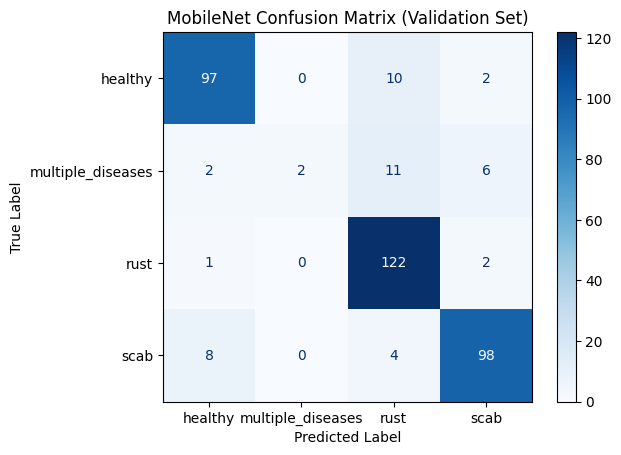

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 1. Load your dataset
dataset = pd.read_csv('/Users/kabilan/Desktop/applant/train.csv')
dataset['image_id'] = dataset['image_id'].astype(str) + '.jpg'

# 2. Split into train and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

# 3. Set batch size
BATCH_SIZE = 32

# 4. Define ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=False,
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True
)

# 5. Define validation generator
valid_generator = datagen.flow_from_dataframe(
    X_valid,
    directory='/Users/kabilan/Desktop/applant/images/',
    x_col='image_id',
    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],
    target_size=(224, 224),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 6. Load your MobileNet model
mobilenet_model = load_model('mobilenet_best_model.h5')

# 7. Predict and compute confusion matrix
y_pred_prob = mobilenet_model.predict(valid_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true = np.argmax(np.concatenate(all_labels, axis=0), axis=1)

class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('MobileNet Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Found 365 validated image filenames.


/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step


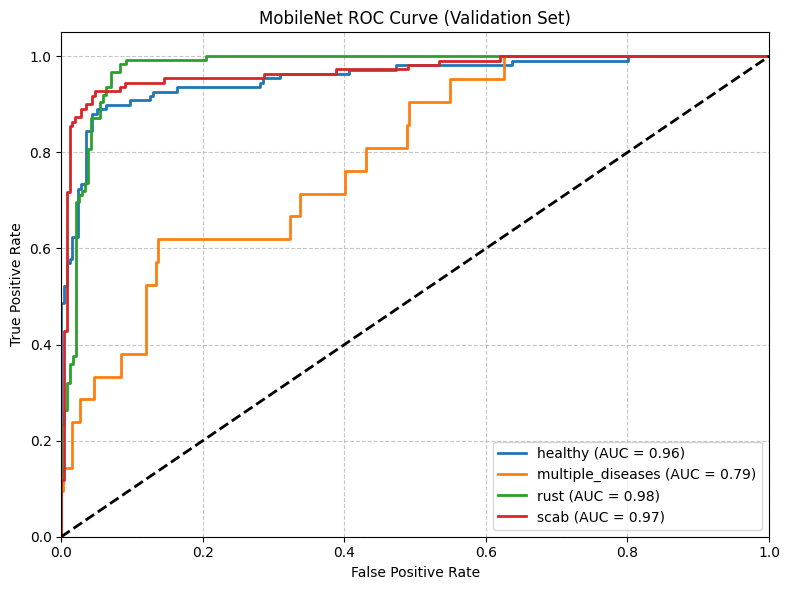

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# 1. Load your dataset
dataset = pd.read_csv('/Users/kabilan/Desktop/applant/train.csv')
dataset['image_id'] = dataset['image_id'].astype(str) + '.jpg'

# 2. Split into train and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.2, shuffle=False)

# 3. Set your batch size
BATCH_SIZE = 32

# 4. Define your ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    zca_whitening=False,
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True
)

# 5. Define your validation generator
valid_generator = datagen.flow_from_dataframe(
    X_valid,
    directory='/Users/kabilan/Desktop/applant/images/',
    x_col='image_id',
    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'],
    target_size=(224, 224),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 6. Load your MobileNet model
mobilenet_model = load_model('mobilenet_best_model.h5')

# 7. Get predictions from your MobileNet model on the validation set
y_pred_prob = mobilenet_model.predict(valid_generator)

# 8. Get true labels from the validation generator
all_labels = []
for _, batch_labels in valid_generator:
    all_labels.append(batch_labels)
    if len(all_labels) * valid_generator.batch_size >= valid_generator.samples:
        break
y_true = np.concatenate(all_labels, axis=0)

# 9. Plot ROC curves for each class
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']
n_classes = y_true.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MobileNet ROC Curve (Validation Set)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()